In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/dataset/ecommerce_dataset_updated.csv')

Mounted at /content/drive


In [ ]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [ ]:
df['Harga_Seharusnya'] = df['Price (Rs.)'] * (1 - df['Discount (%)'] / 100)
selisih = abs(df['Final_Price(Rs.)'] - df['Harga_Seharusnya'])
print(f"   • Kesalahan perhitungan harga: {(selisih > 0.01).sum()} transaksi")

   • Kesalahan perhitungan harga: 0 transaksi


In [ ]:
discount_aneh = ((df['Discount (%)'] < 0) | (df['Discount (%)'] > 100)).sum()
print(f"   • Discount tidak masuk akal: {discount_aneh} transaksi")


   • Discount tidak masuk akal: 0 transaksi


In [ ]:
harga_negatif = (df['Final_Price(Rs.)'] < 0).sum()
print(f"   • Harga negatif: {harga_negatif} transaksi")

   • Harga negatif: 0 transaksi


In [ ]:
print(f"\n Mengkonversi tanggal...")
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')
print(f"   • Range tanggal: {df['Purchase_Date'].min().date()} s/d {df['Purchase_Date'].max().date()}")



 Mengkonversi tanggal...
   • Range tanggal: 2024-01-01 s/d 2024-11-21


In [ ]:
# Kolom waktu
df['Tahun'] = df['Purchase_Date'].dt.year
df['Bulan'] = df['Purchase_Date'].dt.month
df['Nama_Bulan'] = df['Purchase_Date'].dt.month_name()
df['Hari'] = df['Purchase_Date'].dt.day_name()
df['Quarter'] = df['Purchase_Date'].dt.quarter

# Kolom bisnis
df['Jumlah_Diskon_Rupiah'] = df['Price (Rs.)'] - df['Final_Price(Rs.)']

print(" Kolom yang ditambahkan:")
print("  • Tahun, Bulan, Nama_Bulan, Hari, Quarter")
print("  • Jumlah_Diskon_Rupiah")

# 4. Lihat ringkasan data yang sudah diperbaiki
print(f"\n RINGKASAN DATA SETELAH CLEANING:")
print(f"   • Total transaksi: {len(df):,}")
print(f"   • Periode: {(df['Purchase_Date'].max() - df['Purchase_Date'].min()).days} hari")
print(f"   • User unik: {df['User_ID'].nunique():,}")
print(f"   • Produk unik: {df['Product_ID'].nunique():,}")
print(f"   • Kategori: {df['Category'].nunique()} ({list(df['Category'].unique())})")
print(f"   • Metode bayar: {list(df['Payment_Method'].unique())}")

# 5. Statistik finansial
total_revenue = df['Final_Price(Rs.)'].sum()
total_discount = df['Jumlah_Diskon_Rupiah'].sum()
avg_transaction = df['Final_Price(Rs.)'].mean()

print(f"\n RINGKASAN FINANSIAL:")
print(f"   • Total Revenue: Rs. {total_revenue:,.2f}")
print(f"   • Total Discount Diberikan: Rs. {total_discount:,.2f}")
print(f"   • Rata-rata Transaksi: Rs. {avg_transaction:.2f}")
print(f"   • Tingkat Diskon Keseluruhan: {(total_discount/(total_revenue+total_discount))*100:.1f}%")

# 6. Preview data yang sudah diperkaya
print(f"\n Preview 3 data setelah diperkaya:")
kolom_penting = ['User_ID', 'Category', 'Final_Price(Rs.)', 'Discount (%)',
                 'Payment_Method', 'Nama_Bulan', 'Hari']
print(df[kolom_penting].head(3))

 Kolom yang ditambahkan:
  • Tahun, Bulan, Nama_Bulan, Hari, Quarter
  • Jumlah_Diskon_Rupiah

 RINGKASAN DATA SETELAH CLEANING:
   • Total transaksi: 3,660
   • Periode: 325 hari
   • User unik: 3,660
   • Produk unik: 3,660
   • Kategori: 7 (['Sports', 'Clothing', 'Toys', 'Beauty', 'Books', 'Home & Kitchen', 'Electronics'])
   • Metode bayar: ['Net Banking', 'Credit Card', 'UPI', 'Cash on Delivery', 'Debit Card']

 RINGKASAN FINANSIAL:
   • Total Revenue: Rs. 757,278.08
   • Total Discount Diberikan: Rs. 175,292.39
   • Rata-rata Transaksi: Rs. 206.91
   • Tingkat Diskon Keseluruhan: 18.8%

 Preview 3 data setelah diperkaya:
    User_ID  Category  Final_Price(Rs.)  Discount (%) Payment_Method  \
0  337c166f    Sports             31.05            15    Net Banking   
1  d38a19bf  Clothing            186.23            20    Net Banking   
2  d7f5f0b0    Sports            237.76            25    Credit Card   

  Nama_Bulan     Hari  
0   November  Tuesday  
1   February   Friday  
2  S

Revenue per kategori:
   • Clothing: Rs. 115,315 (15.2%)
   • Books: Rs. 111,149 (14.7%)
   • Home & Kitchen: Rs. 110,328 (14.6%)
   • Sports: Rs. 108,519 (14.3%)
   • Toys: Rs. 107,290 (14.2%)
   • Beauty: Rs. 104,215 (13.8%)
   • Electronics: Rs. 100,462 (13.3%)


Text(0, 0.5, 'Jumlah Transaksi')

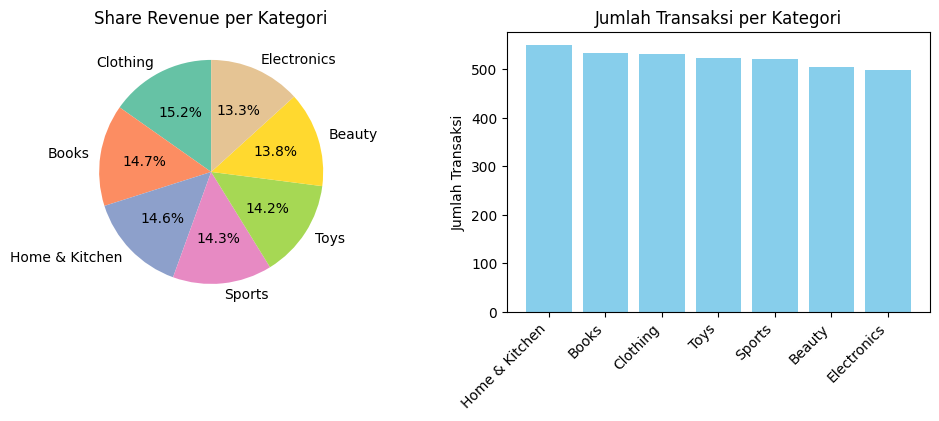

In [ ]:
plt.style.use('default')
sns.set_palette("Set2")

revenue_kategori = df.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)
transaksi_kategori = df['Category'].value_counts()

print("Revenue per kategori:")
for kategori, revenue in revenue_kategori.items():
    persen = (revenue/revenue_kategori.sum())*100
    print(f"   • {kategori}: Rs. {revenue:,.0f} ({persen:.1f}%)")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.pie(revenue_kategori.values, labels=revenue_kategori.index, autopct='%1.1f%%', startangle=90)
plt.title('Share Revenue per Kategori')

plt.subplot(2, 2, 2)
plt.bar(transaksi_kategori.index, transaksi_kategori.values, color='skyblue')
plt.title('Jumlah Transaksi per Kategori')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Jumlah Transaksi')

Revenue per metode pembayaran:
   • Credit Card: Rs. 156,018 (20.6%)
   • UPI: Rs. 154,685 (20.4%)
   • Debit Card: Rs. 153,362 (20.3%)
   • Net Banking: Rs. 146,804 (19.4%)
   • Cash on Delivery: Rs. 146,409 (19.3%)


Text(0, 0.5, 'Jumlah Transaksi')

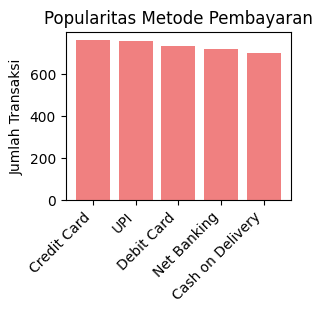

In [ ]:
payment_revenue = df.groupby('Payment_Method')['Final_Price(Rs.)'].sum().sort_values(ascending=False)
payment_count = df['Payment_Method'].value_counts()

print("Revenue per metode pembayaran:")
for method, revenue in payment_revenue.items():
    persen = (revenue/payment_revenue.sum())*100
    print(f"   • {method}: Rs. {revenue:,.0f} ({persen:.1f}%)")

plt.subplot(2, 2, 3)
plt.bar(payment_count.index, payment_count.values, color='lightcoral')
plt.title('Popularitas Metode Pembayaran')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Jumlah Transaksi')

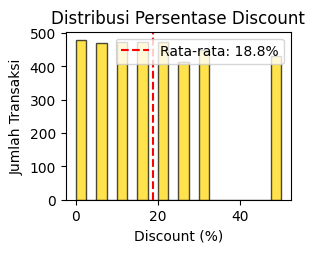

In [ ]:
plt.subplot(2, 2, 4)
plt.hist(df['Discount (%)'], bins=20, color='gold', alpha=0.7, edgecolor='black')
plt.title('Distribusi Persentase Discount')
plt.xlabel('Discount (%)')
plt.ylabel('Jumlah Transaksi')
plt.axvline(df['Discount (%)'].mean(), color='red', linestyle='--',
            label=f'Rata-rata: {df["Discount (%)"].mean():.1f}%')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

print(f"\n Insight dari visualisasi:")
print(f"   • Kategori terlaris: {revenue_kategori.index[0]} (Rs. {revenue_kategori.iloc[0]:,.0f})")
print(f"   • Metode bayar favorit: {payment_count.index[0]} ({payment_count.iloc[0]} transaksi)")
print(f"   • Rata-rata discount: {df['Discount (%)'].mean():.1f}%")

<Figure size 640x480 with 0 Axes>


 Insight dari visualisasi:
   • Kategori terlaris: Clothing (Rs. 115,315)
   • Metode bayar favorit: Credit Card (760 transaksi)
   • Rata-rata discount: 18.8%


In [ ]:
daily_sales = df.groupby('Purchase_Date').agg({
    'Final_Price(Rs.)': 'sum',
    'User_ID': 'count'
}).reset_index()

daily_sales.columns = ['Tanggal', 'Revenue', 'Jumlah_Transaksi']

print(f"   • Tanggal dengan penjualan tertinggi: {daily_sales.loc[daily_sales['Revenue'].idxmax(), 'Tanggal'].date()}")
print(f"     Revenue: Rs. {daily_sales['Revenue'].max():,.0f}")
print(f"   • Rata-rata penjualan per hari: Rs. {daily_sales['Revenue'].mean():,.0f}")


   • Tanggal dengan penjualan tertinggi: 2024-07-18
     Revenue: Rs. 4,698
   • Rata-rata penjualan per hari: Rs. 2,323


In [ ]:
hari_revenue = df.groupby('Hari')['Final_Price(Rs.)'].sum()
# Urutkan sesuai hari normal
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hari_revenue = hari_revenue.reindex(urutan_hari)

print("Revenue per hari dalam minggu:")
for hari, revenue in hari_revenue.items():
    persen = (revenue/hari_revenue.sum())*100
    print(f"   • {hari}: Rs. {revenue:,.0f} ({persen:.1f}%)")

Revenue per hari dalam minggu:
   • Monday: Rs. 108,624 (14.3%)
   • Tuesday: Rs. 112,300 (14.8%)
   • Wednesday: Rs. 103,008 (13.6%)
   • Thursday: Rs. 113,187 (14.9%)
   • Friday: Rs. 106,049 (14.0%)
   • Saturday: Rs. 98,827 (13.1%)
   • Sunday: Rs. 115,282 (15.2%)


In [ ]:
bulan_revenue = df.groupby(['Tahun', 'Bulan']).agg({
    'Final_Price(Rs.)': 'sum',
    'User_ID': 'count'
}).reset_index()

bulan_revenue['Bulan_Tahun'] = bulan_revenue['Tahun'].astype(str) + '-' + bulan_revenue['Bulan'].astype(str).str.zfill(2)

print("Revenue per bulan:")
for _, row in bulan_revenue.tail(6).iterrows():  # 6 bulan terakhir
    print(f"   • {row['Bulan_Tahun']}: Rs. {row['Final_Price(Rs.)']:,.0f} ({row['User_ID']} transaksi)")


Revenue per bulan:
   • 2024-06: Rs. 64,257 (323 transaksi)
   • 2024-07: Rs. 72,798 (346 transaksi)
   • 2024-08: Rs. 71,507 (344 transaksi)
   • 2024-09: Rs. 68,043 (342 transaksi)
   • 2024-10: Rs. 76,035 (362 transaksi)
   • 2024-11: Rs. 51,915 (245 transaksi)


Text(0.5, 1.0, 'Revenue per Quarter')

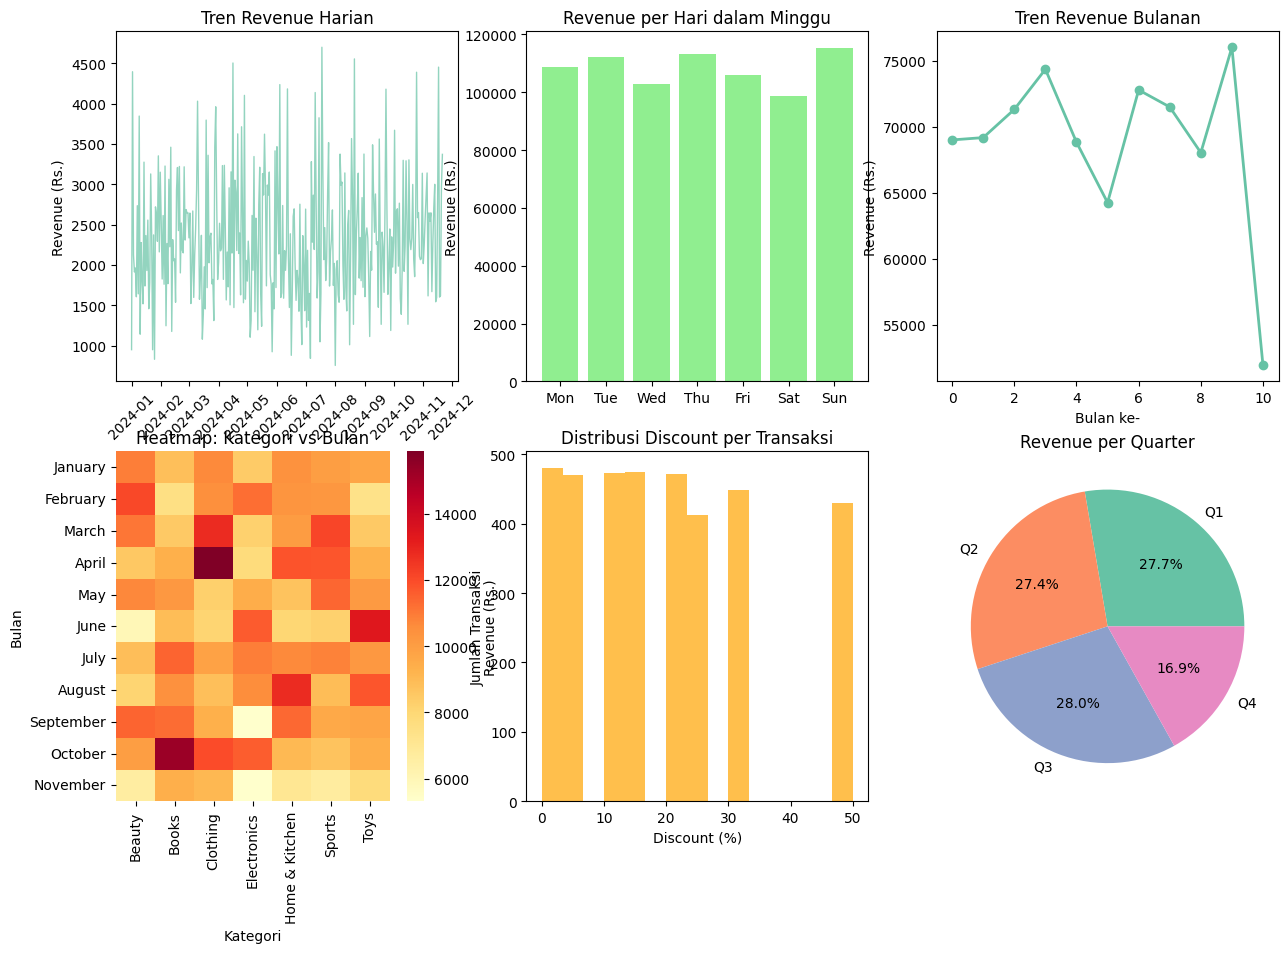

In [ ]:
plt.figure(figsize=(15, 10))

# Plot 1: Tren harian
plt.subplot(2, 3, 1)
plt.plot(daily_sales['Tanggal'], daily_sales['Revenue'], linewidth=1, alpha=0.7)
plt.title('Tren Revenue Harian')
plt.ylabel('Revenue (Rs.)')
plt.xticks(rotation=45)

# Plot 2: Revenue per hari dalam minggu
plt.subplot(2, 3, 2)
plt.bar(range(7), hari_revenue.values, color='lightgreen')
plt.title('Revenue per Hari dalam Minggu')
plt.ylabel('Revenue (Rs.)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot 3: Tren bulanan
plt.subplot(2, 3, 3)
plt.plot(bulan_revenue.index, bulan_revenue['Final_Price(Rs.)'], marker='o', linewidth=2)
plt.title('Tren Revenue Bulanan')
plt.ylabel('Revenue (Rs.)')
plt.xlabel('Bulan ke-')

# Plot 4: Heatmap kategori vs bulan
plt.subplot(2, 3, 4)
kategori_bulan = df.groupby(['Nama_Bulan', 'Category'])['Final_Price(Rs.)'].sum().unstack()
# Urutkan bulan
urutan_bulan = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
kategori_bulan_sorted = kategori_bulan.reindex([b for b in urutan_bulan if b in kategori_bulan.index])

sns.heatmap(kategori_bulan_sorted, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Revenue (Rs.)'})
plt.title('Heatmap: Kategori vs Bulan')
plt.xlabel('Kategori')
plt.ylabel('Bulan')

# Plot 5: Distribusi transaksi per jam (jika ada data jam)
plt.subplot(2, 3, 5)
plt.hist(df['Discount (%)'], bins=15, color='orange', alpha=0.7)
plt.title('Distribusi Discount per Transaksi')
plt.xlabel('Discount (%)')
plt.ylabel('Jumlah Transaksi')

# Plot 6: Quarter analysis
plt.subplot(2, 3, 6)
quarter_revenue = df.groupby('Quarter')['Final_Price(Rs.)'].sum()
plt.pie(quarter_revenue.values, labels=[f'Q{i}' for i in quarter_revenue.index], autopct='%1.1f%%')
plt.title('Revenue per Quarter')


In [ ]:
plt.tight_layout()
plt.show()

print(f"\n INSIGHT POLA WAKTU:")

# Hari terbaik dan terburuk
hari_terbaik = hari_revenue.idxmax()
hari_terburuk = hari_revenue.idxmin()
print(f"   • Hari terbaik: {hari_terbaik} (Rs. {hari_revenue[hari_terbaik]:,.0f})")
print(f"   • Hari terlemah: {hari_terburuk} (Rs. {hari_revenue[hari_terburuk]:,.0f})")

# Growth analysis (jika ada lebih dari 1 bulan)
if len(bulan_revenue) > 1:
    growth = ((bulan_revenue.iloc[-1]['Final_Price(Rs.)'] - bulan_revenue.iloc[0]['Final_Price(Rs.)']) /
              bulan_revenue.iloc[0]['Final_Price(Rs.)']) * 100
    print(f"   • Growth dari bulan pertama ke terakhir: {growth:.1f}%")

# Weekend vs Weekday
weekend = ['Saturday', 'Sunday']
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_revenue = hari_revenue[weekend].sum()
weekday_revenue = hari_revenue[weekday].sum()

print(f"   • Weekend revenue: Rs. {weekend_revenue:,.0f} ({(weekend_revenue/(weekend_revenue+weekday_revenue))*100:.1f}%)")
print(f"   • Weekday revenue: Rs. {weekday_revenue:,.0f} ({(weekday_revenue/(weekend_revenue+weekday_revenue))*100:.1f}%)")

<Figure size 640x480 with 0 Axes>


 INSIGHT POLA WAKTU:
   • Hari terbaik: Sunday (Rs. 115,282)
   • Hari terlemah: Saturday (Rs. 98,827)
   • Growth dari bulan pertama ke terakhir: -24.8%
   • Weekend revenue: Rs. 214,110 (28.3%)
   • Weekday revenue: Rs. 543,168 (71.7%)


In [ ]:
customer_analysis = df.groupby('User_ID').agg({
    'Final_Price(Rs.)': 'sum',          # Total spending (Monetary)
    'Purchase_Date': 'first',           # Kapan transaksi (Recency)
    'Category': 'first',                # Kategori yang dibeli
    'Discount (%)': 'first',            # Discount yang didapat
    'Payment_Method': 'first'           # Metode pembayaran
}).reset_index()

# Hitung recency (berapa hari sejak transaksi terakhir)
analysis_date = df['Purchase_Date'].max()
customer_analysis['Recency_Days'] = (analysis_date - customer_analysis['Purchase_Date']).dt.days

print(f"✅ Data customer dianalisis:")
print(f"   • Total customers: {len(customer_analysis):,}")
print(f"   • Spending range: Rs. {customer_analysis['Final_Price(Rs.)'].min():.0f} - Rs. {customer_analysis['Final_Price(Rs.)'].max():.0f}")
print(f"   • Recency range: {customer_analysis['Recency_Days'].min()} - {customer_analysis['Recency_Days'].max()} hari")

✅ Data customer dianalisis:
   • Total customers: 3,660
   • Spending range: Rs. 6 - Rs. 497
   • Recency range: 0 - 325 hari


In [ ]:
# Buat quartiles untuk spending
customer_analysis['Spending_Quartile'] = pd.qcut(customer_analysis['Final_Price(Rs.)'],
                                                 q=4, labels=['Low', 'Medium', 'High', 'VIP'])

spending_segments = customer_analysis.groupby('Spending_Quartile').agg({
    'Final_Price(Rs.)': ['count', 'mean', 'sum'],
    'Recency_Days': 'mean',
    'Category': lambda x: x.mode().iloc[0]
}).round(2)

spending_segments.columns = ['Customer_Count', 'Avg_Spending', 'Total_Revenue', 'Avg_Recency', 'Popular_Category']

print("Customer Segments berdasarkan Spending:")
for segment in spending_segments.index:
    data = spending_segments.loc[segment]
    pct = (data['Customer_Count'] / len(customer_analysis)) * 100
    print(f"   • {segment:6}: {data['Customer_Count']:4.0f} customers ({pct:4.1f}%) | "
          f"Avg: Rs. {data['Avg_Spending']:6.0f} | "
          f"Total: Rs. {data['Total_Revenue']:8.0f} | "
          f"Kategori: {data['Popular_Category']}")


Customer Segments berdasarkan Spending:
   • Low   :  915 customers (25.0%) | Avg: Rs.     55 | Total: Rs.    50071 | Kategori: Beauty
   • Medium:  915 customers (25.0%) | Avg: Rs.    151 | Total: Rs.   138553 | Kategori: Home & Kitchen
   • High  :  915 customers (25.0%) | Avg: Rs.    249 | Total: Rs.   227693 | Kategori: Home & Kitchen
   • VIP   :  915 customers (25.0%) | Avg: Rs.    373 | Total: Rs.   340961 | Kategori: Clothing


/tmp/ipython-input-3334552402.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_segments = customer_analysis.groupby('Spending_Quartile').agg({


In [ ]:
category_customers = customer_analysis.groupby('Category').agg({
    'Final_Price(Rs.)': ['count', 'mean', 'sum'],
    'Recency_Days': 'mean',
    'Discount (%)': 'mean'
}).round(2)

category_customers.columns = ['Customer_Count', 'Avg_Spending', 'Total_Revenue', 'Avg_Recency', 'Avg_Discount']
category_customers = category_customers.sort_values('Total_Revenue', ascending=False)

print("Customer Segments berdasarkan Kategori:")
for category in category_customers.index:
    data = category_customers.loc[category]
    print(f"   • {category:15}: {data['Customer_Count']:3.0f} customers | "
          f"Avg: Rs. {data['Avg_Spending']:6.0f} | "
          f"Discount: {data['Avg_Discount']:4.1f}%")


Customer Segments berdasarkan Kategori:
   • Clothing       : 531 customers | Avg: Rs.    217 | Discount: 17.9%
   • Books          : 534 customers | Avg: Rs.    208 | Discount: 19.0%
   • Home & Kitchen : 549 customers | Avg: Rs.    201 | Discount: 19.6%
   • Sports         : 520 customers | Avg: Rs.    209 | Discount: 19.3%
   • Toys           : 523 customers | Avg: Rs.    205 | Discount: 18.1%
   • Beauty         : 505 customers | Avg: Rs.    206 | Discount: 18.5%
   • Electronics    : 498 customers | Avg: Rs.    202 | Discount: 19.3%


In [ ]:
payment_by_segment = pd.crosstab(customer_analysis['Spending_Quartile'],
                                customer_analysis['Payment_Method'],
                                normalize='index') * 100

print("Payment Method Preference per Spending Segment (%):")
print(payment_by_segment.round(1))

Payment Method Preference per Spending Segment (%):
Payment_Method     Cash on Delivery  Credit Card  Debit Card  Net Banking  \
Spending_Quartile                                                           
Low                            19.0         21.0        19.5         19.2   
Medium                         19.1         22.0        18.7         19.2   
High                           17.8         19.5        22.2         21.0   
VIP                            20.1         20.7        19.6         18.8   

Payment_Method      UPI  
Spending_Quartile        
Low                21.3  
Medium             21.0  
High               19.6  
VIP                20.9  


Text(0.5, 102.72222222222219, 'Payment Method')

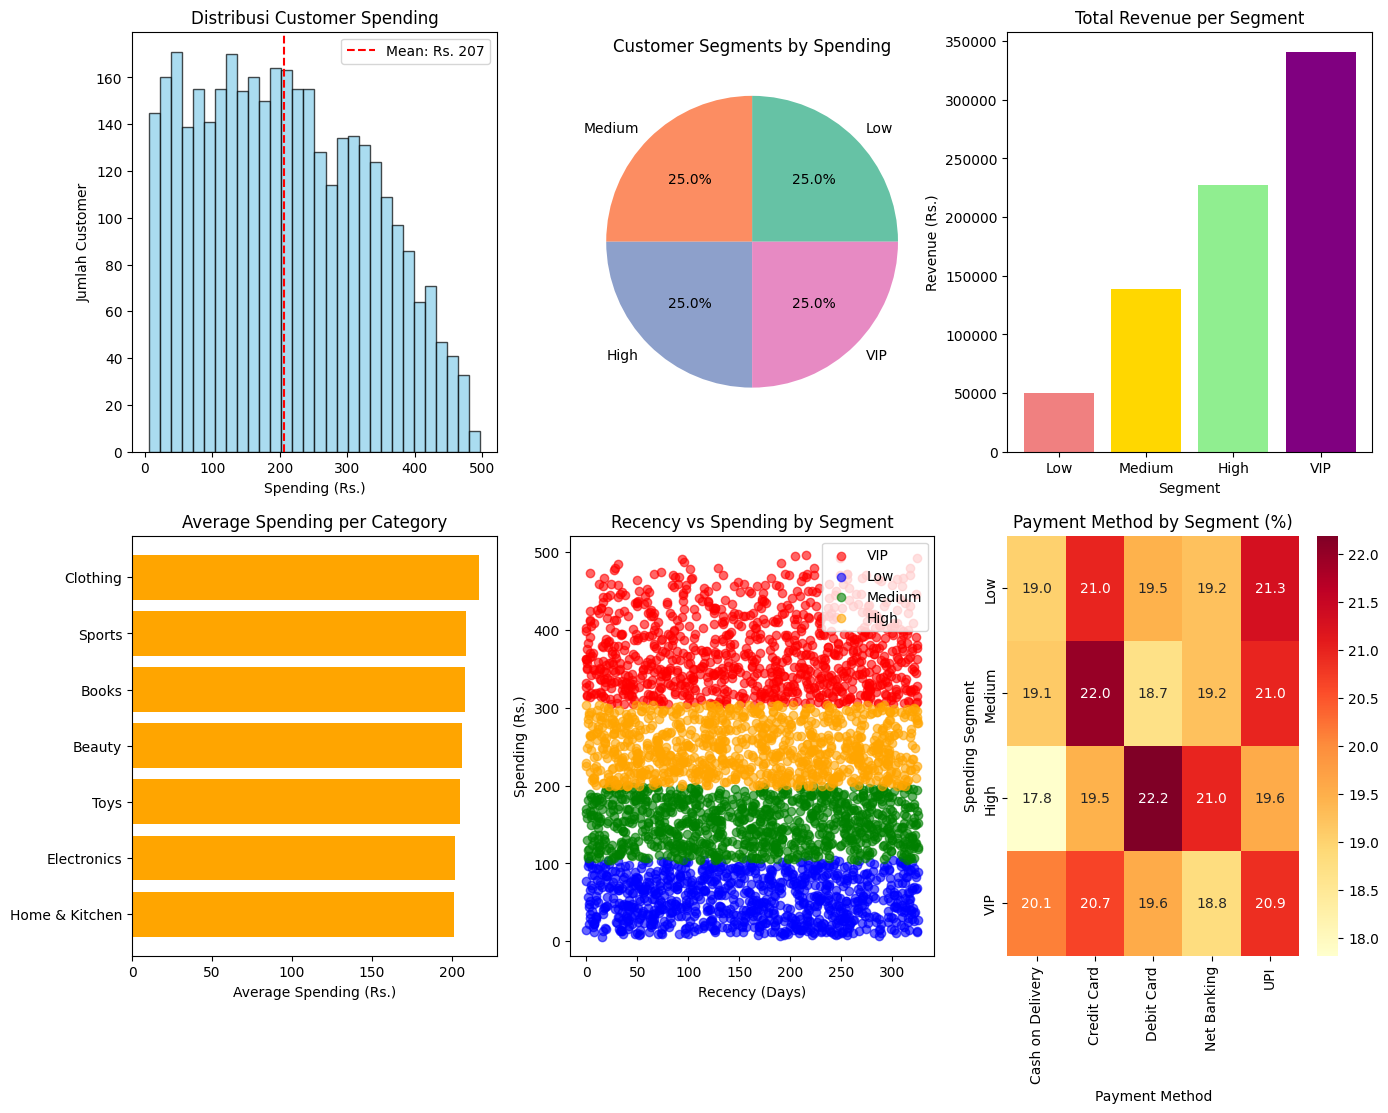

In [ ]:
plt.figure(figsize=(16, 12))

# Plot 1: Distribusi Spending
plt.subplot(2, 3, 1)
plt.hist(customer_analysis['Final_Price(Rs.)'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(customer_analysis['Final_Price(Rs.)'].mean(), color='red', linestyle='--',
            label=f'Mean: Rs. {customer_analysis["Final_Price(Rs.)"].mean():.0f}')
plt.title('Distribusi Customer Spending')
plt.xlabel('Spending (Rs.)')
plt.ylabel('Jumlah Customer')
plt.legend()

# Plot 2: Spending Segments
plt.subplot(2, 3, 2)
segment_counts = customer_analysis['Spending_Quartile'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segments by Spending')

# Plot 3: Revenue per Segment
plt.subplot(2, 3, 3)
plt.bar(spending_segments.index, spending_segments['Total_Revenue'], color=['lightcoral', 'gold', 'lightgreen', 'purple'])
plt.title('Total Revenue per Segment')
plt.ylabel('Revenue (Rs.)')
plt.xlabel('Segment')

# Plot 4: Category vs Spending
plt.subplot(2, 3, 4)
category_spending = customer_analysis.groupby('Category')['Final_Price(Rs.)'].mean().sort_values(ascending=True)
plt.barh(category_spending.index, category_spending.values, color='orange')
plt.title('Average Spending per Category')
plt.xlabel('Average Spending (Rs.)')

# Plot 5: Recency vs Spending Scatter
plt.subplot(2, 3, 5)
colors = {'Low': 'blue', 'Medium': 'green', 'High': 'orange', 'VIP': 'red'}
for segment in customer_analysis['Spending_Quartile'].unique():
    segment_data = customer_analysis[customer_analysis['Spending_Quartile'] == segment]
    plt.scatter(segment_data['Recency_Days'], segment_data['Final_Price(Rs.)'],
               alpha=0.6, label=segment, color=colors[segment])
plt.xlabel('Recency (Days)')
plt.ylabel('Spending (Rs.)')
plt.title('Recency vs Spending by Segment')
plt.legend()

# Plot 6: Payment Heatmap
plt.subplot(2, 3, 6)
sns.heatmap(payment_by_segment, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Payment Method by Segment (%)')
plt.ylabel('Spending Segment')
plt.xlabel('Payment Method')

In [ ]:
plt.tight_layout()
plt.show()

# 6. BUSINESS INSIGHTS & RECOMMENDATIONS
print(f"\n BUSINESS INSIGHTS & RECOMMENDATIONS:")
print("=" * 45)

# VIP Customer Analysis
vip_customers = customer_analysis[customer_analysis['Spending_Quartile'] == 'VIP']
vip_revenue = vip_customers['Final_Price(Rs.)'].sum()
vip_avg = vip_customers['Final_Price(Rs.)'].mean()

print(f" VIP CUSTOMERS ({len(vip_customers)} customers):")
print(f"   • Kontribusi revenue: Rs. {vip_revenue:,.0f} ({(vip_revenue/customer_analysis['Final_Price(Rs.)'].sum())*100:.1f}%)")
print(f"   • Rata-rata spending: Rs. {vip_avg:.0f}")
print(f"   • Kategori favorit: {vip_customers['Category'].mode().iloc[0]}")

# Low Spender Analysis
low_customers = customer_analysis[customer_analysis['Spending_Quartile'] == 'Low']
print(f"\n LOW SPENDERS ({len(low_customers)} customers):")
print(f"   • Avg spending: Rs. {low_customers['Final_Price(Rs.)'].mean():.0f}")
print(f"   • Kategori favorit: {low_customers['Category'].mode().iloc[0]}")
print(f"   • Avg discount: {low_customers['Discount (%)'].mean():.1f}%")

print(f"\n REKOMENDASI STRATEGY:")
print("   1. VIP RETENTION: Buat loyalty program untuk VIP customers")
print("   2. UPSELLING: Target Medium customers untuk naik ke High segment")
print("   3. CATEGORY FOCUS: Optimasi inventory untuk kategori populer per segment")
print("   4. PAYMENT: Tingkatkan kemudahan payment method yang disukai per segment")
print("   5. DISCOUNT STRATEGY: Sesuaikan discount dengan segment spending behavior")

<Figure size 640x480 with 0 Axes>


 BUSINESS INSIGHTS & RECOMMENDATIONS:
 VIP CUSTOMERS (915 customers):
   • Kontribusi revenue: Rs. 340,961 (45.0%)
   • Rata-rata spending: Rs. 373
   • Kategori favorit: Clothing

 LOW SPENDERS (915 customers):
   • Avg spending: Rs. 55
   • Kategori favorit: Beauty
   • Avg discount: 22.5%

 REKOMENDASI STRATEGY:
   1. VIP RETENTION: Buat loyalty program untuk VIP customers
   2. UPSELLING: Target Medium customers untuk naik ke High segment
   3. CATEGORY FOCUS: Optimasi inventory untuk kategori populer per segment
   4. PAYMENT: Tingkatkan kemudahan payment method yang disukai per segment
   5. DISCOUNT STRATEGY: Sesuaikan discount dengan segment spending behavior


# **INSIGHT**

Berdasarkan analisis data e-commerce ini, terlihat pola menarik terkait perilaku pelanggan, performa kategori produk, serta efektivitas strategi diskon. Dari sisi kontribusi revenue, kelompok pelanggan VIP meskipun jumlahnya relatif sedikit ternyata menyumbang hampir separuh dari total penjualan. Kondisi ini menunjukkan pentingnya menjaga loyalitas mereka melalui strategi personalisasi, seperti program membership eksklusif atau penawaran khusus. Sebaliknya, kelompok low spender jumlahnya sangat besar tetapi kontribusi nilai belanja jauh lebih rendah. Segmen ini berpotensi dioptimalkan melalui promosi diskon ringan, bundling produk, atau kampanye pemasaran yang mendorong frekuensi pembelian lebih tinggi.

Distribusi pembelian juga memperlihatkan bahwa kategori produk tertentu lebih dominan pada segmen berbeda. Hal ini menegaskan bahwa strategi inventori maupun promosi tidak bisa disamaratakan. Kategori yang menjadi andalan pelanggan VIP dapat difokuskan untuk menjaga kepuasan, sementara kategori populer bagi low spender bisa diposisikan sebagai pintu masuk untuk meningkatkan keterikatan. Dari sisi metode pembayaran, tampak adanya perbedaan preferensi antara segmen yang memberikan indikasi bahwa kerjasama dengan penyedia layanan pembayaran tertentu dapat dimanfaatkan untuk program promosi yang lebih efektif dan tepat sasaran.

Analisis diskon menunjukkan rata-rata potongan harga sekitar 22% khususnya pada kelompok low spender. Meskipun strategi ini mampu menarik minat awal, terdapat risiko penurunan margin apabila tidak diatur dengan cermat. Oleh karena itu, diskon perlu diarahkan lebih strategis, misalnya dengan menargetkan produk tertentu yang ingin didorong atau menggabungkannya dengan benefit non-monetary seperti poin reward. Secara keseluruhan, hasil analisis ini menggarisbawahi pentingnya pendekatan berbasis data untuk mengelola strategi pemasaran, mempertahankan pelanggan bernilai tinggi, sekaligus mengembangkan potensi segmen yang masih rendah kontribusinya.